# Classification: Genre predicting using baseline models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_formats = ['svg']  # or svg
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

sns.set(context='notebook', style='darkgrid', font_scale=0.8, rc={
    'axes.facecolor':'#2b41bc', 
    'axes.grid.which': 'major', 
    'grid.color': '#ffffff'})

## Data cleaning

In [203]:
# import data
df = pd.read_csv('/Users/joycetagal/Github/metis/reg/SpotifyFeatures.csv')

In [82]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


In [204]:
df['genre'].unique()

array(['Opera', 'A Capella', 'Alternative', 'Blues', 'Dance', 'Pop',
       'Electronic', 'R&B', 'Children’s Music', 'Folk', 'Anime', 'Rap',
       'Classical', 'Reggae', 'Hip-Hop', 'Comedy', 'Country', 'Reggaeton',
       'Ska', 'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World',
       'Movie'], dtype=object)

In [205]:
df['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Alternative         9353
Blues               9353
Children’s Music    9353
Anime               9353
Folk                9299
Hip-Hop             9295
Rock                9272
Classical           9256
Rap                 9232
World               9096
Soul                9089
R&B                 8992
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
A Capella            119
Name: genre, dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228159 entries, 0 to 228158
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             228159 non-null  object 
 1   artist_name       228159 non-null  object 
 2   track_name        228159 non-null  object 
 3   track_id          228159 non-null  object 
 4   popularity        228159 non-null  int64  
 5   acousticness      228159 non-null  float64
 6   danceability      228159 non-null  float64
 7   duration_ms       228159 non-null  int64  
 8   energy            228159 non-null  float64
 9   instrumentalness  228159 non-null  float64
 10  key               228159 non-null  object 
 11  liveness          228159 non-null  float64
 12  loudness          228159 non-null  float64
 13  mode              228159 non-null  object 
 14  speechiness       228159 non-null  float64
 15  tempo             228159 non-null  float64
 16  time_signature    22

In [206]:
# replace mode with binary (as per Spotify Web API)
# https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features
df = df.replace({'mode': {'Major':1, 'Minor':0}})
df = df.replace({'key': {'C#':1, 'D#':3, 'C':0, 'D':2, 'G#':8, 'F#':6, 'B':11, 'A':9, 'G':7, 'E':4, 'A#':10, 'F':5}})

In [207]:
# Remove podcasts and other non-music genres
mask = ~df['genre'].isin(['Comedy', 'Movie', 'Soundtrack', 'A Capella'])

In [208]:
df = df[mask]
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,1,0.0964,-14.287,1,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,3,0.1330,-19.794,1,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,0,0.3630,-8.415,1,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,2,0.1200,-33.440,1,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,2,0.0969,-23.625,1,0.0493,172.935,4/4,0.0382


[Text(0, 0, 'Indie'),
 Text(1, 0, 'Jazz'),
 Text(2, 0, 'Pop'),
 Text(3, 0, 'Electronic'),
 Text(4, 0, 'Blues'),
 Text(5, 0, 'Children’s Music'),
 Text(6, 0, 'Anime'),
 Text(7, 0, 'Alternative'),
 Text(8, 0, 'Folk'),
 Text(9, 0, 'Hip-Hop'),
 Text(10, 0, 'Rock'),
 Text(11, 0, 'Classical'),
 Text(12, 0, 'Rap'),
 Text(13, 0, 'World'),
 Text(14, 0, 'Soul'),
 Text(15, 0, 'R&B'),
 Text(16, 0, 'Reggaeton'),
 Text(17, 0, 'Ska'),
 Text(18, 0, 'Reggae'),
 Text(19, 0, 'Dance'),
 Text(20, 0, 'Country'),
 Text(21, 0, 'Opera')]

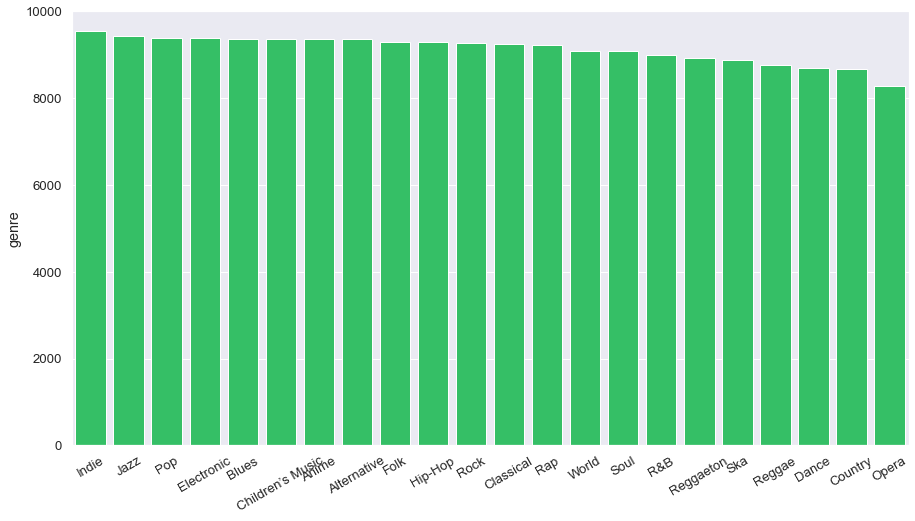

In [259]:
sns.set(font_scale=1.2)
plt.figure(figsize = (15,8))
ax = sns.barplot(x=df['genre'].value_counts().index, y=df['genre'].value_counts(), color='#1ed65f')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In [210]:
X = df.select_dtypes(exclude=['object']).copy().reset_index(drop=True)

In [211]:
y = df['genre'].reset_index(drop=True)

In [201]:
X.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,21,0.986,0.313,490867,0.23100,0.000431,1,0.0964,-14.287,1,0.0547,86.001,0.0886
1,18,0.972,0.360,176797,0.20100,0.028000,3,0.1330,-19.794,1,0.0581,131.798,0.3690
2,10,0.935,0.168,266184,0.47000,0.020400,0,0.3630,-8.415,1,0.0383,75.126,0.0696
3,17,0.961,0.250,288573,0.00605,0.000000,2,0.1200,-33.440,1,0.0480,76.493,0.0380
4,19,0.985,0.142,629760,0.05800,0.146000,2,0.0969,-23.625,1,0.0493,172.935,0.0382


In [212]:
X.shape

(200907, 13)

In [15]:
y.shape

(200907,)

In [16]:
y.tail()

200902    Opera
200903    Opera
200904    Opera
200905    Opera
200906    Opera
Name: genre, dtype: object

In [227]:
# Create list of model and accuracy dicts
list_of_perform = []

# List to keep track of models
models = []

# List to keep track of y_scores
y_scores = []

## KNN
### 1) Naive kNN

In [213]:
# Naive KNN with scaled values
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Split training and testing data
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=11)
# Split data one more time into train and eval
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [215]:
knn_naive = KNeighborsClassifier()
knn_naive.fit(X_tr, y_train)
y_train_pred = knn_naive.predict(X_tr)
y_pred = knn_naive.predict(X_te)
knn_base_y_score = knn_naive.predict_proba(X_te)

In [228]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# save to dict
list_of_perform.append(dict([
    ('Model', 'KNN Naive'),
    ('Train Accuracy', round(metrics.accuracy_score(y_train, y_train_pred), 2)),
    ('Test Accuracy', round(metrics.accuracy_score(y_test, y_pred), 2)),
    ('Train Precision', round(metrics.precision_score(y_train, y_train_pred, average='weighted'), 2)),
    ('Test Precision', round(precision, 2)),
    ('Test Recall', round(recall, 2)),
    ('Test F1', round(fscore, 2))
     ]))

# Add model to list
models.append('KNN Naive')

# Add y_score to list
y_scores.append(knn_base_y_score)

Precision : 0.27131755669427376
Recall    : 0.24919118013040664
F-score   : 0.2548939005513972


Since this is a multiclass classification, the mean accuracy score can be compared to the naive baseline accuracy which would be 100% divided by the number of unique targets, namely the accuracy if our model naively predicted just one target across all predictions. This is assuming that our targets are equally distributed across the data, which is roughly the case. 

Recall that in the MVP with only 6 selected genres, we had a mean accuracy score of 44%, which is significantly better than a naive accuracy of 100%/6 = 16.67%. 

In this case, we now have 22 unique target genres, which means that in a naive model which guessed only "Opera" for all the predictions would have a mean accuracy of 100%/22 = 4.54%. Thus, the KNN model performs better than the naive model at 27.11% mean accuracy across all targets.

That being said, we 

In [19]:
# Let's do a pipeline that involves the following steps
# Scale the training data
# Use Kfold cross-validator to split data
# Use GridSearchCV to test parameters 

from sklearn.model_selection import (cross_val_score, KFold, GridSearchCV)
from sklearn.metrics import make_scorer, precision_score, accuracy_score, precision_recall_fscore_support, recall_score, f1_score
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scale", StandardScaler()),
                 ("knn", KNeighborsClassifier())
                ])

### 2) kNN optimized with GridSearch

In [256]:
# GridSearch for KNN best model

params = [{'knn__leaf_size': [15, 20], 'knn__n_neighbors': [35, 37, 39]}]

# random shuffle
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Create weighted scorer
scoring_functions = {'precision': make_scorer(precision_score, average = 'weighted', zero_division=0),
                     'recall': make_scorer(recall_score, average = 'weighted', zero_division=0),
                     'f1': make_scorer(f1_score, average = 'weighted', zero_division=0)
                    }

#Use GridSearch and refit for precision
grid_knn = GridSearchCV(pipe, params, scoring=scoring_functions, cv=kfold, refit='precision')

#Fit the model
best_model_knn = grid_knn.fit(X_train, y_train)

In [22]:
#Print The value of best Hyperparameters
print('Best estimator:', best_model_knn.best_estimator_)
print('Best leaf_size:', best_model_knn.best_estimator_.get_params()['knn__leaf_size'])
print('Best n_neighbors:', best_model_knn.best_estimator_.get_params()['knn__n_neighbors'])
print('Best mean precision score: {:6.2f}%'.format(100*best_model_knn.best_score_))

Best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(leaf_size=15, n_neighbors=35))])
Best leaf_size: 15
Best n_neighbors: 35
Best mean precision score:  30.59%


In [26]:
y_predict_knn = best_model_knn.predict(X_train)
y_predict_knn_test = best_model_knn.predict(X_test)
knn_gs_y_score = best_model_knn.predict_proba(X_test)

Overall, my chosen metric will be precision, because we care more about not labelling a negative sample as a positive, as opposed to labelling all positive samples as positive (recall). Contextually, a user will be more frustrated that a rap song shows up in their Classical music playlist, and will care less that a playlist hits all the Classical music in the Spotify catalog.

In [219]:
y_test.shape

(40182,)

In [230]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict_knn_test, average='weighted')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# save to dict
list_of_perform.append(dict([
    ('Model', 'KNN GS'),
    ('Train Accuracy', round(metrics.accuracy_score(y_train, y_predict_knn), 2)),
    ('Test Accuracy', round(metrics.accuracy_score(y_test, y_predict_knn_test), 2)),
    ('Train Precision', round(metrics.precision_score(y_train, y_predict_knn, average='weighted'), 2)),
    ('Test Precision', round(precision, 2)),
    ('Test Recall', round(recall, 2)),
    ('Test F1', round(fscore, 2))
     ]))

# Add model to list
models.append('KNN GS')

# Add y_score to list
y_scores.append(knn_gs_y_score)

Precision : 0.2975967910487211
Recall    : 0.3069035886715445
F-score   : 0.2977570548863324


In [231]:
list_of_perform

[{'Model': 'KNN Naive',
  'Train Accuracy': 0.45,
  'Test Accuracy': 0.25,
  'Train Precision': 0.49,
  'Test Precision': 0.27,
  'Test Recall': 0.25,
  'Test F1': 0.25},
 {'Model': 'KNN GS',
  'Train Accuracy': 0.37,
  'Test Accuracy': 0.31,
  'Train Precision': 0.37,
  'Test Precision': 0.3,
  'Test Recall': 0.31,
  'Test F1': 0.3}]

In [129]:
print('Train precision score is: {:6.2f}%'.format(100*precision_score(y_train, y_predict_knn, average='weighted')))
print('Test precision score is: {:6.2f}%'.format(100*precision_score(y_test, y_predict_knn_test, average='weighted')))
print('Test recall score is: {:6.2f}%'.format(100*recall_score(y_test, y_predict_knn_test, average='weighted')))
print('Test F1 score is: {:6.2f}%'.format(100*precision_score(y_test, y_predict_knn_test, average='weighted')))


Train precision score is:  36.57%
Test precision score is:  29.76%
Test recall score is:  30.69%
Test F1 score is:  29.76%


It looks like there's still some amount of overfitting in our model. Since this is a multiclass model, our accuracy score is an average across the model and even our F1 score is an average albeit a weighted average. To fully understand what's going on, let's examine each target in greater detail without averaging.

In [28]:
prfs = precision_recall_fscore_support(y_test, y_predict_knn_test, average=None)
prfs = pd.DataFrame(prfs).T
prfs['genre'] = ['Alternative', 'Anime', 'Blues', 'Children’s Music',
       'Classical', 'Country', 'Dance', 'Electronic', 'Folk', 'Hip-Hop',
       'Indie', 'Jazz', 'Opera', 'Pop', 'R&B', 'Rap', 'Reggae',
       'Reggaeton', 'Rock', 'Ska', 'Soul', 'World']
prfs.columns = ["precision", "recall",  "fscore",  "support", "genre"]
prfs.sort_values('precision', ascending=False)

,precision,recall,fscore,support,genre
12,0.752775,0.873536,0.808672,1708.0,Opera
19,0.705400,0.566411,0.628311,1822.0,Ska
4,0.650027,0.643533,0.646764,1902.0,Classical
7,0.493318,0.488423,0.490859,1814.0,Electronic
17,0.490538,0.553993,0.520338,1778.0,Reggaeton
21,0.445016,0.390299,0.415865,1773.0,World
16,0.427178,0.387839,0.406559,1694.0,Reggae
11,0.373690,0.380064,0.376850,1876.0,Jazz
5,0.265411,0.452687,0.334629,1712.0,Country
13,0.239703,0.310566,0.270572,1874.0,Pop


As we can see here, once we break down the genres, we see a wide range of scores from an precision score of 75.3% (Opera) to 6.0% (Anime). Unsurprisingly, the more specific genres (e.g. Ska, Opera, Classical, Electronic) have higher scores in general.

## Decision Tree
### 3) Random Forest Baseline

In [30]:
# Naive decision tree
from sklearn.tree import DecisionTreeClassifier

decisiontree_naive = DecisionTreeClassifier()
decisiontree_naive.fit(X_train, y_train)
ypred_nv_dt = decisiontree_naive.predict(X_train)
ypred_nv_dt_test = decisiontree_naive.predict(X_test)
dt_naive_y_score = decisiontree_naive.predict_proba(X_test)

print('Accuracy score: {:6.2f}%'.format(100*metrics.accuracy_score(y_test, ypred_nv_dt_test)))
print('Train precision score is: {:6.2f}%'.format(100*precision_score(y_train, ypred_nv_dt, average='weighted')))
print('Test precision score is: {:6.2f}%'.format(100*precision_score(y_test, ypred_nv_dt_test, average='weighted')))

Accuracy score:  21.54%
Train precision score is:  79.93%
Test precision score is:  22.76%


In [232]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, ypred_nv_dt_test, average='weighted')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# save to dict
list_of_perform.append(dict([
    ('Model', 'DT Naive'),
    ('Train Accuracy', round(metrics.accuracy_score(y_train, ypred_nv_dt), 2)),
    ('Test Accuracy', round(metrics.accuracy_score(y_test, ypred_nv_dt_test), 2)),
    ('Train Precision', round(metrics.precision_score(y_train, ypred_nv_dt, average='weighted'), 2)),
    ('Test Precision', round(precision, 2)),
    ('Test Recall', round(recall, 2)),
    ('Test F1', round(fscore, 2))
     ]))

# Add model to list
models.append('DT Naive')

# Add y_score to list
y_scores.append(dt_naive_y_score)

Precision : 0.22759173860239856
Recall    : 0.21537006619879548
F-score   : 0.22052621606661155


Wow, the naive decision tree really overfit! Let's see if we can do better with GridSearchCV

### 4) DecisionTree Optimized with GridSearch

In [31]:
# GridSearch for decision tree best model

decisiontree = DecisionTreeClassifier()
params = [{'max_depth': [10, 15, 20, 25, 30], 
           'max_leaf_nodes': [200, 250, 300, 350, 400, 450, 500, None],
           'class_weight': ['balanced']}]

# random shuffle
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Create weighted scorer
scoring_functions = {'precision': make_scorer(precision_score, average = 'weighted', zero_division=0),
                     'recall': make_scorer(recall_score, average = 'weighted', zero_division=0),
                     'f1': make_scorer(f1_score, average = 'weighted', zero_division=0)
                    }

#Use GridSearch
grid_dt = GridSearchCV(decisiontree, params, scoring=scoring_functions, cv=kfold, refit='precision')

#Fit the model
best_model_dt = grid_dt.fit(X_train, y_train)

In [32]:
#Print The value of best Hyperparameters
print('Best estimator:', best_model_dt.best_estimator_)
print('Best max_depth:', best_model_dt.best_estimator_.get_params()['max_depth'])
print('Best max_leaf_nodes:', best_model_dt.best_estimator_.get_params()['max_leaf_nodes'])
print('Best mean precision score: {:6.2f}%'.format(100*best_model_dt.best_score_))

Best estimator: DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       max_leaf_nodes=500)
Best max_depth: 15
Best max_leaf_nodes: 500
Best mean precision score:  31.93%


In [33]:
y_predict_dt = best_model_dt.predict(X_train)
y_predict_dt_test = best_model_dt.predict(X_test)
dt_gs_y_score = best_model_dt.predict_proba(X_test)

In [36]:
print('Train precision score is: {:6.2f}%'.format(100*precision_score(y_train, y_predict_dt, average='weighted', zero_division=0)))
print('Test precision score is: {:6.2f}%'.format(100*precision_score(y_test, y_predict_dt_test, average='weighted', zero_division=0)))

Train precision score is:  34.20%
Test precision score is:  31.22%


The overfitting has improved, with about the same performance on test data. There's still an amount of overfitting, so if we choose this model we can go back and try and fix the overfitting. First, let's see if the range for the targets improve.

In [233]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict_dt_test, average='weighted')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# save to dict
list_of_perform.append(dict([
    ('Model', 'DT GS'),
    ('Train Accuracy', round(metrics.accuracy_score(y_train, y_predict_dt), 2)),
    ('Test Accuracy', round(metrics.accuracy_score(y_test, y_predict_dt_test), 2)),
    ('Train Precision', round(metrics.precision_score(y_train, y_predict_dt, average='weighted'), 2)),
    ('Test Precision', round(precision, 2)),
    ('Test Recall', round(recall, 2)),
    ('Test F1', round(fscore, 2))
     ]))

# Add model to list
models.append('DT GS')

# Add y_score to list
y_scores.append(dt_gs_y_score)

/Users/joycetagal/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision : 0.31222039951102165
Recall    : 0.323901249315614
F-score   : 0.30811118871675125


/Users/joycetagal/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [245]:
list_of_perform

[{'Model': 'KNN Naive',
  'Train Accuracy': 0.45,
  'Test Accuracy': 0.25,
  'Train Precision': 0.49,
  'Test Precision': 0.27,
  'Test Recall': 0.25,
  'Test F1': 0.25},
 {'Model': 'KNN GS',
  'Train Accuracy': 0.37,
  'Test Accuracy': 0.31,
  'Train Precision': 0.37,
  'Test Precision': 0.3,
  'Test Recall': 0.31,
  'Test F1': 0.3},
 {'Model': 'DT Naive',
  'Train Accuracy': 0.74,
  'Test Accuracy': 0.22,
  'Train Precision': 0.8,
  'Test Precision': 0.23,
  'Test Recall': 0.22,
  'Test F1': 0.22},
 {'Model': 'DT GS',
  'Train Accuracy': 0.35,
  'Test Accuracy': 0.32,
  'Train Precision': 0.34,
  'Test Precision': 0.31,
  'Test Recall': 0.32,
  'Test F1': 0.31},
 {'Model': 'RF Naive',
  'Train Accuracy': 0.74,
  'Test Accuracy': 0.3,
  'Train Precision': 0.74,
  'Test Precision': 0.3,
  'Test Recall': 0.3,
  'Test F1': 0.3},
 {'Model': 'RF GS',
  'Train Accuracy': 0.38,
  'Test Accuracy': 0.34,
  'Train Precision': 0.38,
  'Test Precision': 0.33,
  'Test Recall': 0.34,
  'Test F1': 0

In [37]:
prfs_dt = precision_recall_fscore_support(y_test, y_predict_dt_test, average=None, zero_division=0)
prfs_dt = pd.DataFrame(prfs_dt).T
prfs_dt['genre'] = ['Alternative', 'Anime', 'Blues', 'Children’s Music',
       'Classical', 'Country', 'Dance', 'Electronic', 'Folk', 'Hip-Hop',
       'Indie', 'Jazz', 'Opera', 'Pop', 'R&B', 'Rap', 'Reggae',
       'Reggaeton', 'Rock', 'Ska', 'Soul', 'World']
prfs_dt.columns = ["precision", "recall",  "fscore",  "support", "genre"]
prfs_dt.sort_values('precision', ascending=False)

,precision,recall,fscore,support,genre
12,0.870122,0.874707,0.872409,1708.0,Opera
4,0.696800,0.721346,0.708861,1902.0,Classical
19,0.668746,0.588364,0.625985,1822.0,Ska
17,0.542326,0.443195,0.487775,1778.0,Reggaeton
21,0.498158,0.381275,0.431949,1773.0,World
7,0.453059,0.473539,0.463073,1814.0,Electronic
16,0.377262,0.393743,0.385326,1694.0,Reggae
11,0.348983,0.356610,0.352755,1876.0,Jazz
5,0.296760,0.401285,0.341197,1712.0,Country
9,0.246300,0.383644,0.300000,1822.0,Hip-Hop


Looking at the genres, we can see that the model performs really well on certain genres and poorly on others, with precision scores ranging from 87.0% (Opera) to 0% (Children's Music). The range is larger overall compared to our KNN model.

## Random Forest

### 5) Naive Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Naive RF
randomforest_naive = RandomForestClassifier()
randomforest_naive.fit(X_train, y_train)
ypred_nv_rf = randomforest_naive.predict(X_train)
ypred_nv_rf_test = randomforest_naive.predict(X_test)
rf_nv_y_score = randomforest_naive.predict_proba(X_test)

print('Accuracy score: {:6.2f}%'.format(100*metrics.accuracy_score(y_test, ypred_nv_rf_test)))
print('Train precision score is: {:6.2f}%'.format(100*precision_score(y_train, ypred_nv_rf, average='weighted')))
print('Test precision score is: {:6.2f}%'.format(100*precision_score(y_test, ypred_nv_rf_test, average='weighted')))

Accuracy score:  29.60%
Train precision score is:  74.06%
Test precision score is:  29.81%


In [235]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, ypred_nv_rf_test, average='weighted')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# save to dict
list_of_perform.append(dict([
    ('Model', 'RF Naive'),
    ('Train Accuracy', round(metrics.accuracy_score(y_train, ypred_nv_rf), 2)),
    ('Test Accuracy', round(metrics.accuracy_score(y_test, ypred_nv_rf_test), 2)),
    ('Train Precision', round(metrics.precision_score(y_train, ypred_nv_rf, average='weighted'), 2)),
    ('Test Precision', round(precision, 2)),
    ('Test Recall', round(recall, 2)),
    ('Test F1', round(fscore, 2))
     ]))

# Add model to list
models.append('RF Naive')

# Add y_score to list
y_scores.append(rf_nv_y_score)

Precision : 0.2980637713025361
Recall    : 0.2960280722711662
F-score   : 0.2962888663823459


Lower precision score compared to the DT, and similar overfitting.

### 6) Random Forest Optimized with GridSearch

In [240]:
# GridSearch for Random Forest best model

randomforest = RandomForestClassifier()

params = [{'n_estimators': [10, 15, 20, 25, 30], 
           'max_depth': [10, 15, 20, None],
           'criterion': ['entropy', 'gini'],
           'class_weight': ['balanced'],
           'random_state': [42]}]

# random shuffle
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Create weighted scorer
scoring_functions = {'precision': make_scorer(precision_score, average = 'weighted', zero_division=0),
                     'recall': make_scorer(recall_score, average = 'weighted', zero_division=0),
                     'f1': make_scorer(f1_score, average = 'weighted', zero_division=0)
                    }

#Use GridSearch
grid_rf = GridSearchCV(randomforest, params, scoring=scoring_functions, cv=kfold, refit='precision')

#Fit the model
best_model_rf = grid_rf.fit(X_train, y_train)

In [241]:
#Print The value of best Hyperparameters
print('Best estimator:', best_model_rf.best_estimator_)
print('Best n_estimators:', best_model_rf.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model_rf.best_estimator_.get_params()['max_depth'])
print('Best criterion:', best_model_rf.best_estimator_.get_params()['criterion'])
print('Best mean precision score: {:6.2f}%'.format(100*best_model_rf.best_score_))

Best estimator: RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=15,
                       random_state=42)
Best n_estimators: 15
Best max_depth: 10
Best criterion: gini
Best mean precision score:  32.44%


In [243]:
y_predict_rf = best_model_rf.predict(X_train)
y_predict_rf_test = best_model_rf.predict(X_test)
rf_gs_y_score = best_model_rf.predict_proba(X_test)

In [244]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict_rf_test, average='weighted')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# save to dict
list_of_perform.append(dict([
    ('Model', 'RF GS'),
    ('Train Accuracy', round(metrics.accuracy_score(y_train, y_predict_rf), 2)),
    ('Test Accuracy', round(metrics.accuracy_score(y_test, y_predict_rf_test), 2)),
    ('Train Precision', round(metrics.precision_score(y_train, y_predict_rf, average='weighted'), 2)),
    ('Test Precision', round(precision, 2)),
    ('Test Recall', round(recall, 2)),
    ('Test F1', round(fscore, 2))
     ]))

# Add model to list
models.append('RF GS')

# Add y_score to list
y_scores.append(rf_gs_y_score)

Precision : 0.3250266781378266
Recall    : 0.3419441540988502
F-score   : 0.3240362456219885


In [246]:
prfs_rf = precision_recall_fscore_support(y_test, y_predict_rf_test, average=None, labels = ['Alternative', 'Anime', 'Blues', 'Children’s Music',
       'Classical', 'Country', 'Dance', 'Electronic', 'Folk', 'Hip-Hop',
       'Indie', 'Jazz', 'Opera', 'Pop', 'R&B', 'Rap', 'Reggae',
       'Reggaeton', 'Rock', 'Ska', 'Soul', 'World'], zero_division=0)
prfs_rf = pd.DataFrame(prfs_rf).T
prfs_rf['genre'] = ['Alternative', 'Anime', 'Blues', 'Children’s Music',
       'Classical', 'Country', 'Dance', 'Electronic', 'Folk', 'Hip-Hop',
       'Indie', 'Jazz', 'Opera', 'Pop', 'R&B', 'Rap', 'Reggae',
       'Reggaeton', 'Rock', 'Ska', 'Soul', 'World']
prfs_rf.columns = ["precision", "recall",  "fscore",  "support", "genre"]
prfs_rf.sort_values('precision', ascending=False)

,precision,recall,fscore,support,genre
12,0.839161,0.913349,0.874685,1708.0,Opera
4,0.706728,0.723449,0.714991,1902.0,Classical
19,0.647968,0.621295,0.634351,1822.0,Ska
7,0.513670,0.538589,0.525834,1814.0,Electronic
17,0.500478,0.588301,0.540848,1778.0,Reggaeton
21,0.500336,0.420192,0.456775,1773.0,World
11,0.410830,0.372068,0.390490,1876.0,Jazz
16,0.398741,0.411452,0.404997,1694.0,Reggae
5,0.330693,0.390187,0.357985,1712.0,Country
20,0.252061,0.116621,0.159463,1835.0,Soul


The RF model is the best model so far, with a mean weighted precision score of 32.36% on unseen data, and a range of precision scores on the targets ranging from 87.9% (Opera) to 2.47% (Children's Music). Let's choose this model and see if we can improve it from our current baseline.

Text(0.5, 1.0, 'Random Forest GS Precision scores')

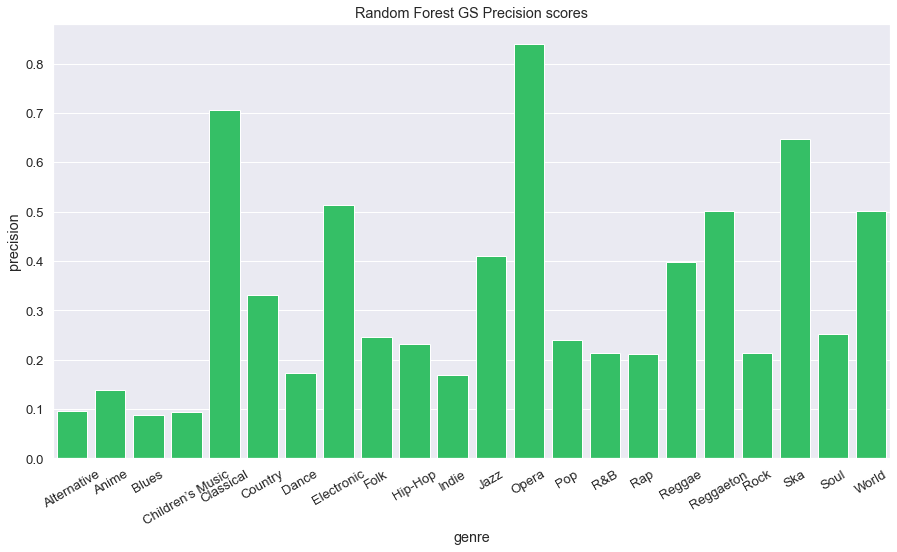

In [260]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x=prfs_rf['genre'],y=prfs_rf['precision'], color='#1ed65f')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title("Random Forest GS Precision scores")

In [247]:
print('Train precision score is: {:6.2f}%'.format(100*precision_score(y_train, y_predict_rf, average='weighted')))
print('Test precision score is: {:6.2f}%'.format(100*precision_score(y_test, y_predict_rf_test, average='weighted')))

Train precision score is:  37.83%
Test precision score is:  32.50%


## Extra Trees

### Naive Extra Trees

In [345]:
from sklearn.ensemble import ExtraTreesClassifier

extratrees_naive = ExtraTreesClassifier()
extratrees_naive.fit(X_train, y_train)
ypred_nv_et = extratrees_naive.predict(X_train)
ypred_nv_et_test = extratrees_naive.predict(X_test)
et_nv_y_score = extratrees_naive.predict_proba(X_test)

print('Accuracy score: {:6.2f}%'.format(100*metrics.accuracy_score(y_test, ypred_nv_et_test)))
print('Train precision score is: {:6.2f}%'.format(100*precision_score(y_train, ypred_nv_et, average='weighted')))
print('Test precision score is: {:6.2f}%'.format(100*precision_score(y_test, ypred_nv_et_test, average='weighted')))

Accuracy score:  29.24%
Train precision score is:  79.93%
Test precision score is:  29.32%


In [346]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, ypred_nv_et_test, average='weighted')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# save to dict
list_of_perform.append(dict([
    ('Model', 'ET Naive'),
    ('Train Accuracy', round(metrics.accuracy_score(y_train, ypred_nv_et), 2)),
    ('Test Accuracy', round(metrics.accuracy_score(y_test, ypred_nv_et_test), 2)),
    ('Train Precision', round(metrics.precision_score(y_train, ypred_nv_et, average='weighted'), 2)),
    ('Test Precision', round(precision, 2)),
    ('Test Recall', round(recall, 2)),
    ('Test F1', round(fscore, 2))
     ]))

# Add model to list
models.append('ET Naive')

# Add y_score to list
y_scores.append(et_nv_y_score)

Precision : 0.2932430261377526
Recall    : 0.29241949131451894
F-score   : 0.29098821350905796


In [347]:
list_of_perform

[{'Model': 'KNN Naive',
  'Train Accuracy': 0.45,
  'Test Accuracy': 0.25,
  'Train Precision': 0.49,
  'Test Precision': 0.27,
  'Test Recall': 0.25,
  'Test F1': 0.25},
 {'Model': 'KNN GS',
  'Train Accuracy': 0.37,
  'Test Accuracy': 0.31,
  'Train Precision': 0.37,
  'Test Precision': 0.3,
  'Test Recall': 0.31,
  'Test F1': 0.3},
 {'Model': 'DT Naive',
  'Train Accuracy': 0.74,
  'Test Accuracy': 0.22,
  'Train Precision': 0.8,
  'Test Precision': 0.23,
  'Test Recall': 0.22,
  'Test F1': 0.22},
 {'Model': 'DT GS',
  'Train Accuracy': 0.35,
  'Test Accuracy': 0.32,
  'Train Precision': 0.34,
  'Test Precision': 0.31,
  'Test Recall': 0.32,
  'Test F1': 0.31},
 {'Model': 'RF Naive',
  'Train Accuracy': 0.74,
  'Test Accuracy': 0.3,
  'Train Precision': 0.74,
  'Test Precision': 0.3,
  'Test Recall': 0.3,
  'Test F1': 0.3},
 {'Model': 'RF GS',
  'Train Accuracy': 0.38,
  'Test Accuracy': 0.34,
  'Train Precision': 0.38,
  'Test Precision': 0.33,
  'Test Recall': 0.34,
  'Test F1': 0

## Performance Metrics

In [348]:
model_perf = pd.DataFrame(data=list_of_perform)
model_perf

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Test Recall,Test F1
0,KNN Naive,0.45,0.25,0.49,0.27,0.25,0.25
1,KNN GS,0.37,0.31,0.37,0.30,0.31,0.30
2,DT Naive,0.74,0.22,0.80,0.23,0.22,0.22
3,DT GS,0.35,0.32,0.34,0.31,0.32,0.31
4,RF Naive,0.74,0.30,0.74,0.30,0.30,0.30
5,RF GS,0.38,0.34,0.38,0.33,0.34,0.32
6,RF GS 2,0.46,0.40,0.47,0.40,0.40,0.39
7,ET Naive,0.74,0.29,0.80,0.29,0.29,0.29


## Feature engineering

Let's see what were the features that were most important for our optimized RF model.

In [249]:
pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model_rf.best_estimator_.feature_importances_
})

,feature,importance
0,popularity,0.321985
1,acousticness,0.125522
2,danceability,0.089942
3,duration_ms,0.040588
4,energy,0.077807
5,instrumentalness,0.091552
6,key,0.002960
7,liveness,0.009758
8,loudness,0.099098
9,mode,0.006246


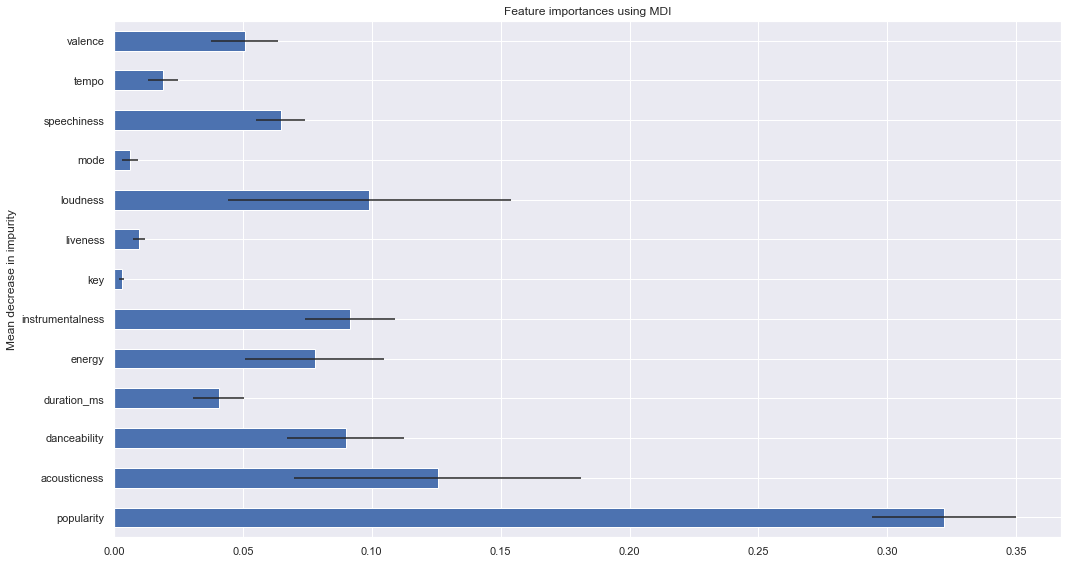

In [253]:
sns.set(font_scale=1)
feature_names = [f"{i}" for i in list(X.columns)]
importances = best_model_rf.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model_rf.best_estimator_.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize = (15,8))
forest_importances.plot.barh(xerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Interestingly, popularity is a very important feature, along with acousticness, instrumentalness, loudness, danceability and energy. 

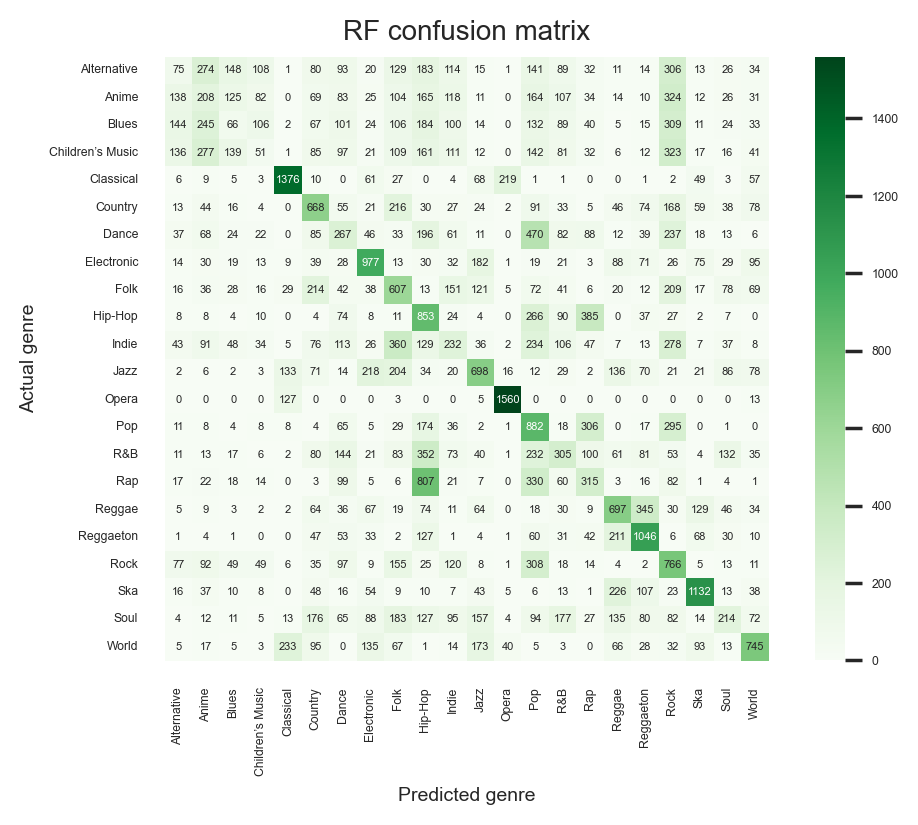

In [265]:
from sklearn.metrics import confusion_matrix
sns.set(font_scale=0.4)
sns.color_palette("crest", as_cmap=True)
# Print confusion matrix for Random Forest
rf_confusion = confusion_matrix(y_test, y_predict_rf_test)
plt.figure(dpi=200)
ax = sns.heatmap(rf_confusion, 
            cmap="Greens", 
            annot=True, 
            annot_kws={"size": 4},
            square=True, 
            fmt='g', 
            xticklabels=best_model_rf.classes_, 
            yticklabels=best_model_rf.classes_
           )
plt.xlabel('Predicted genre', fontsize=7)
plt.ylabel('Actual genre', fontsize=7)
plt.title('RF confusion matrix', fontsize=10);

From the confusion matrix, we can see that the model doesn't do well on several genres, in particular genres such as "Alternative", "Anime", and "Children's Music". Intuitively, it makes sense because these genres are very broad and arguably do not have distinctive audio features to set them apart. For example, Anime music could range from instrumental, classical music from Miyazaki, or to rock music like RADWIMPS. Similarly, for Children's Music. In these cases, we could consider dropping these categories and seeing if the model performs better overall.

However, what is more concerning is for genres which have clear musical differentiation but the model is still getting wrong, such as Blues, R&B, and Rap. We could consider an ensembling model which takes the best 3 models we have so far, and combining them. Using an ensembling technique means we will reduce interpretability, but since this model will be used primarily to automate the creation of user playlists, interpretability is not that important. 

In [268]:
df.shape

(200907, 18)

In [304]:
# Remove low-performing genres
# Add back in time-signature as binary
mask = ~df2['genre'].isin(["Alternative", "Anime", 'Children’s Music'])
df2 = df2[mask]
df2['time_signature_bin'] = ['1' if x == '4/4' else '0' for x in df2['time_signature']]
df2['time_signature_bin'] = df2['time_signature_bin'].astype(int)

In [305]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172848 entries, 0 to 226766
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   genre               172848 non-null  object 
 1   artist_name         172848 non-null  object 
 2   track_name          172848 non-null  object 
 3   track_id            172848 non-null  object 
 4   popularity          172848 non-null  int64  
 5   acousticness        172848 non-null  float64
 6   danceability        172848 non-null  float64
 7   duration_ms         172848 non-null  int64  
 8   energy              172848 non-null  float64
 9   instrumentalness    172848 non-null  float64
 10  key                 172848 non-null  int64  
 11  liveness            172848 non-null  float64
 12  loudness            172848 non-null  float64
 13  mode                172848 non-null  int64  
 14  speechiness         172848 non-null  float64
 15  tempo               172848 non-nul

In [306]:
df2['genre'].unique()

array(['Opera', 'Blues', 'Dance', 'Pop', 'Electronic', 'R&B', 'Folk',
       'Rap', 'Classical', 'Reggae', 'Hip-Hop', 'Country', 'Reggaeton',
       'Ska', 'Indie', 'Rock', 'Soul', 'Jazz', 'World'], dtype=object)

In [307]:
X2 = df2.select_dtypes(exclude=['object']).copy().reset_index(drop=True)
y2 = df2['genre'].reset_index(drop=True)

In [308]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172848 entries, 0 to 172847
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   popularity          172848 non-null  int64  
 1   acousticness        172848 non-null  float64
 2   danceability        172848 non-null  float64
 3   duration_ms         172848 non-null  int64  
 4   energy              172848 non-null  float64
 5   instrumentalness    172848 non-null  float64
 6   key                 172848 non-null  int64  
 7   liveness            172848 non-null  float64
 8   loudness            172848 non-null  float64
 9   mode                172848 non-null  int64  
 10  speechiness         172848 non-null  float64
 11  tempo               172848 non-null  float64
 12  valence             172848 non-null  float64
 13  time_signature_bin  172848 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 18.5 MB


In [320]:
X2.shape

(138278, 14)

In [321]:
y2.shape

(138278,)

In [322]:
# Split training and testing data
X2, X_test2, y2, y_test2 = train_test_split(X2, y2, test_size=.2, random_state=11)
# Split data one more time into train and eval
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y2, test_size=.25, random_state=3)

In [323]:
y_train2.unique()

array(['Country', 'R&B', 'Hip-Hop', 'Jazz', 'Classical', 'Indie', 'Blues',
       'Pop', 'Rap', 'Electronic', 'Opera', 'Dance', 'Ska', 'Reggaeton',
       'World', 'Folk', 'Rock', 'Soul', 'Reggae'], dtype=object)

In [324]:
# Use new data - GridSearch for Random Forest best model 

randomforest_2 = RandomForestClassifier()

params = [{'n_estimators': [10, 15, 20, 25, 30], 
           'max_depth': [10, 15, 20, None],
           'criterion': ['entropy', 'gini'],
           'class_weight': ['balanced'],
           'random_state': [42]}]

# random shuffle
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Create weighted scorer
scoring_functions = {'precision': make_scorer(precision_score, average = 'weighted', zero_division=0),
                     'recall': make_scorer(recall_score, average = 'weighted', zero_division=0),
                     'f1': make_scorer(f1_score, average = 'weighted', zero_division=0)
                    }

#Use GridSearch
grid_rf_2 = GridSearchCV(randomforest_2 , params, scoring=scoring_functions, cv=kfold, refit='precision')

#Fit the model
best_model_rf_2 = grid_rf_2.fit(X_train2, y_train2)

In [326]:
y_predict_rf_2 = best_model_rf_2.predict(X_train2)
y_predict_rf_test_2 = best_model_rf_2.predict(X_test2)
rf_gs_2_y_score = best_model_rf_2.predict_proba(X_test2)

In [339]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test2, y_predict_rf_test_2, average='weighted')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# save to dict
list_of_perform.append(dict([
    ('Model', 'RF GS 2'),
    ('Train Accuracy', round(metrics.accuracy_score(y_train2, y_predict_rf_2), 2)),
    ('Test Accuracy', round(metrics.accuracy_score(y_test2, y_predict_rf_test_2), 2)),
    ('Train Precision', round(metrics.precision_score(y_train2, y_predict_rf_2, average='weighted'), 2)),
    ('Test Precision', round(precision, 2)),
    ('Test Recall', round(recall, 2)),
    ('Test F1', round(fscore, 2))
     ]))

# Add model to list
models.append('RF GS 2')

# Add y_score to list
y_scores.append(rf_gs_2_y_score)

Precision : 0.39836712088880377
Recall    : 0.40360138848712757
F-score   : 0.3934988416261012


In [315]:
np.sort(y_test2.unique())

array(['Blues', 'Classical', 'Country', 'Dance', 'Electronic', 'Folk',
       'Hip-Hop', 'Indie', 'Jazz', 'Opera', 'Pop', 'R&B', 'Rap', 'Reggae',
       'Reggaeton', 'Rock', 'Ska', 'Soul', 'World'], dtype=object)

In [328]:
prfs_rf2 = precision_recall_fscore_support(y_test2, y_predict_rf_test_2, average=None, labels = ['Blues', 'Classical', 'Country', 'Dance',
       'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Opera', 'Pop',
       'R&B', 'Rap', 'Reggae', 'Reggaeton', 'Rock', 'Ska', 'Soul',
       'World'], zero_division=0)
prfs_rf2 = pd.DataFrame(prfs_rf2).T
prfs_rf2['genre'] = ['Blues', 'Classical', 'Country', 'Dance',
       'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Opera', 'Pop',
       'R&B', 'Rap', 'Reggae', 'Reggaeton', 'Rock', 'Ska', 'Soul',
       'World']
prfs_rf2.columns = ["precision", "recall",  "fscore",  "support", "genre"]
prfs_rf2.sort_values('precision', ascending=False)

,precision,recall,fscore,support,genre
9,0.853589,0.909160,0.880499,1321.0,Opera
1,0.715333,0.782754,0.747526,1496.0,Classical
16,0.679094,0.664996,0.671971,1397.0,Ska
18,0.548102,0.424761,0.478613,1462.0,World
4,0.542138,0.559014,0.550447,1542.0,Electronic
14,0.523929,0.569863,0.545932,1460.0,Reggaeton
8,0.448738,0.377822,0.410238,1506.0,Jazz
13,0.445746,0.406695,0.425326,1404.0,Reggae
2,0.387718,0.468364,0.424242,1375.0,Country
0,0.302003,0.265943,0.282828,1474.0,Blues


Text(0.5, 1.0, 'Random Forest GS 2 Precision scores')

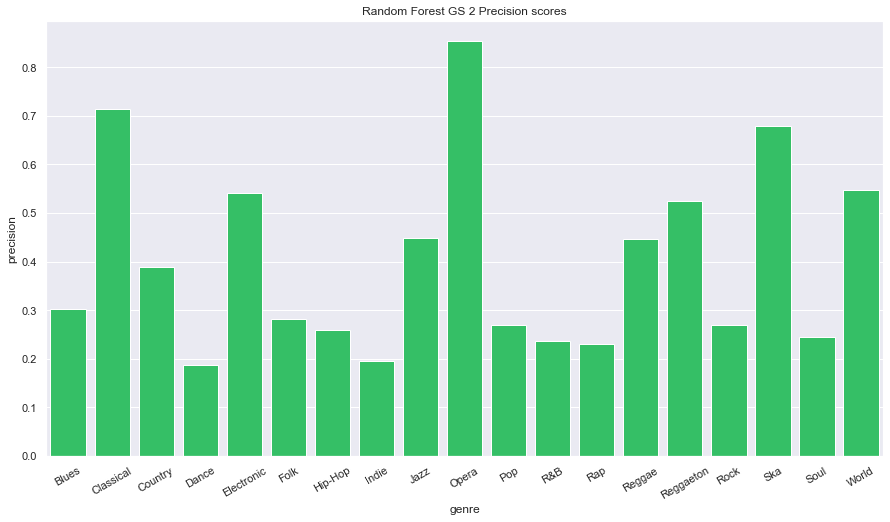

In [329]:
sns.set(font_scale=1)
plt.figure(figsize = (15,8))
ax = sns.barplot(x=prfs_rf2['genre'],y=prfs_rf2['precision'], color='#1ed65f')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title("Random Forest GS 2 Precision scores")

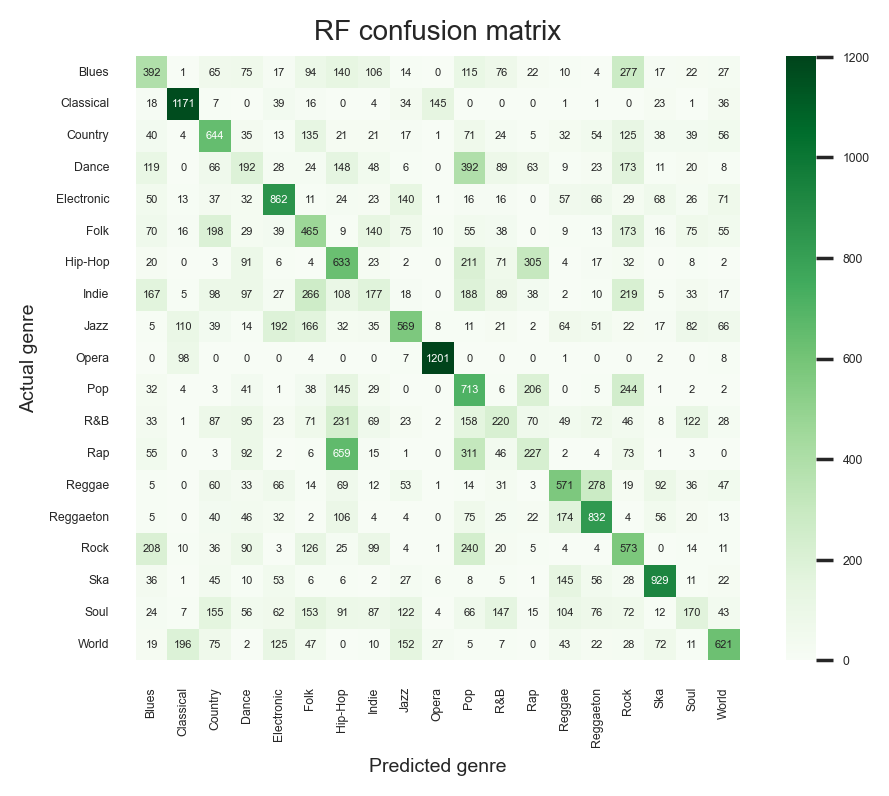

In [343]:
sns.set(font_scale=0.4)
sns.color_palette("crest", as_cmap=True)
# Print confusion matrix for Random Forest
rf_confusion2 = confusion_matrix(y_test2, y_predict_rf_test_2)
plt.figure(dpi=200)
ax = sns.heatmap(rf_confusion2, 
            cmap="Greens", 
            annot=True, 
            annot_kws={"size": 4},
            square=True, 
            fmt='g', 
            xticklabels=best_model_rf_2.classes_, 
            yticklabels=best_model_rf_2.classes_
           )
plt.xlabel('Predicted genre', fontsize=7)
plt.ylabel('Actual genre', fontsize=7)
plt.title('RF confusion matrix', fontsize=10);

In [344]:
pd.DataFrame({
    'feature': X_train2.columns,
    'importance': best_model_rf_2.best_estimator_.feature_importances_
})

,feature,importance
0,popularity,0.304214
1,acousticness,0.107986
2,danceability,0.100165
3,duration_ms,0.042478
4,energy,0.078597
5,instrumentalness,0.092044
6,key,0.004331
7,liveness,0.011984
8,loudness,0.093262
9,mode,0.008514


In [349]:
model_perf = pd.DataFrame(data=list_of_perform)
model_perf

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Test Recall,Test F1
0,KNN Naive,0.45,0.25,0.49,0.27,0.25,0.25
1,KNN GS,0.37,0.31,0.37,0.30,0.31,0.30
2,DT Naive,0.74,0.22,0.80,0.23,0.22,0.22
3,DT GS,0.35,0.32,0.34,0.31,0.32,0.31
4,RF Naive,0.74,0.30,0.74,0.30,0.30,0.30
5,RF GS,0.38,0.34,0.38,0.33,0.34,0.32
6,RF GS 2,0.46,0.40,0.47,0.40,0.40,0.39
7,ET Naive,0.74,0.29,0.80,0.29,0.29,0.29


In [353]:
y_pred_rf2_val = best_model_rf_2.best_estimator_.predict(X_val2)

In [357]:
precision, recall, fscore, support = precision_recall_fscore_support(y_val2, y_pred_rf2_val, average='weighted')
print(f'Holdout Accuracy: ', round(metrics.accuracy_score(y_val2, y_pred_rf2_val), 3))
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

Holdout Accuracy:  0.405
Precision : 0.40113246487260035
Recall    : 0.4050115707260631
F-score   : 0.39539494633794203
